In [43]:
import pandas  as pd
def load_data():
    df_train_feature=pd.read_csv('../input/train_feature.csv')
    df_train_label=pd.read_csv('../input/train_label.csv')
#     df_train_feature=df_train_feature.groupby(by='日期').mean().reset_index()
    df_train=pd.merge(df_train_feature,df_train_label)
    df_train.drop(['时刻'],axis=1,inplace=True)

    df_test_feature=pd.read_csv('../input/test_feature.csv')
#     df_test_feature=df_test_feature.groupby(by='日期').mean().reset_index()
    df_test=df_test_feature.drop(['时刻'],axis=1)

    return df_train,df_test
df_train,df_test=load_data()
df_train.head()

,日期,辐照度,风速,风向,温度,湿度,气压,电场实际太阳辐射指数
0,1,0,2.1,343,-7.2,51,69800,0.108799
1,1,0,3.6,279,-9.4,64,69800,0.108799
2,1,0,2.6,270,-10.1,61,69900,0.108799
3,1,333,1.4,266,-4.2,38,70000,0.108799
4,1,489,0.0,0,-0.2,26,69800,0.108799


## 热力图

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

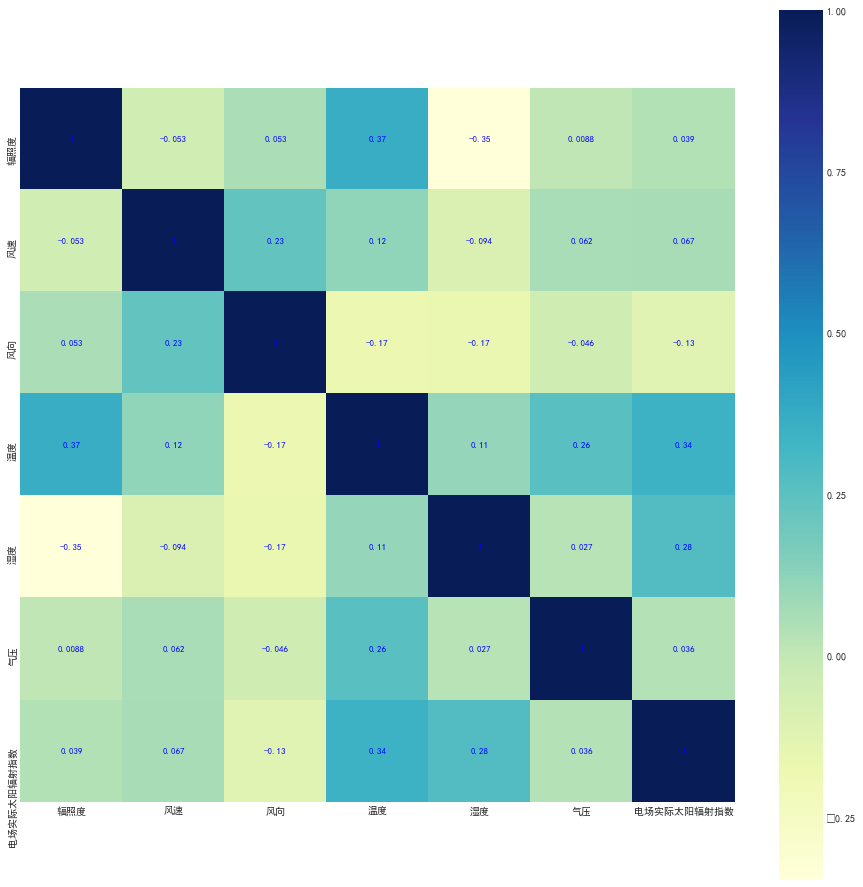

In [45]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 16))
corr = df_train[['辐照度','风速','风向','温度','湿度','气压','电场实际太阳辐射指数']].corr()#计算各变量的相关性系数
sns.heatmap(corr, annot=True,cmap="YlGnBu", annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'},square=True)#绘制相关性系数热力图
plt.show()

从上面热力图我们可以看出，相关性系数的绝对值越大，两个变量相关性越强，负值为负相关，正值为正相关。与“电场实际太阳能辐射指数”相关性排序：温度>湿度>风向>辐照度>风速>气压

## 分布图

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


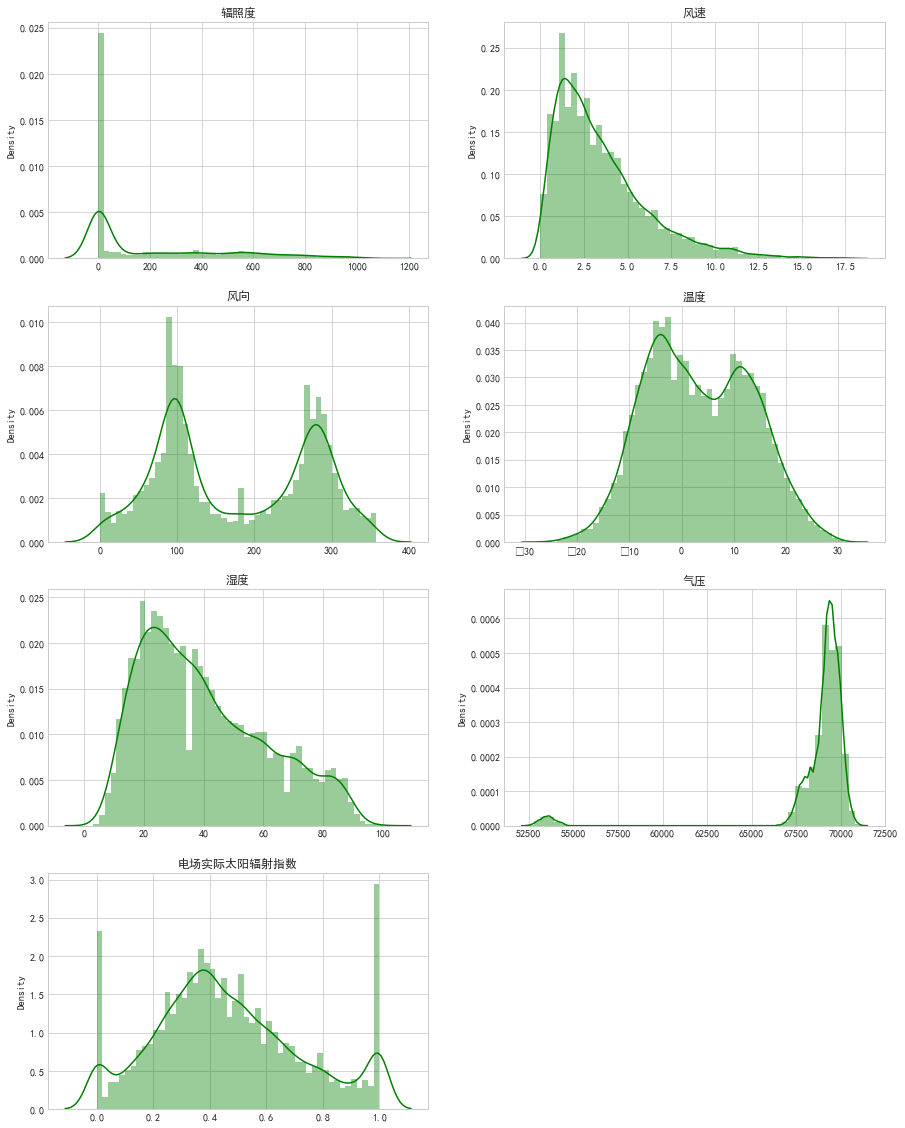

In [46]:
columns=['辐照度','风速','风向','温度','湿度','气压','电场实际太阳辐射指数']
grid = gridspec.GridSpec(4, 2)
plt.figure(figsize=(15,20))

for n, col in enumerate(df_train[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df_train[col], bins = 50, color='g') #Will receive the "semi-salmon" violin
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

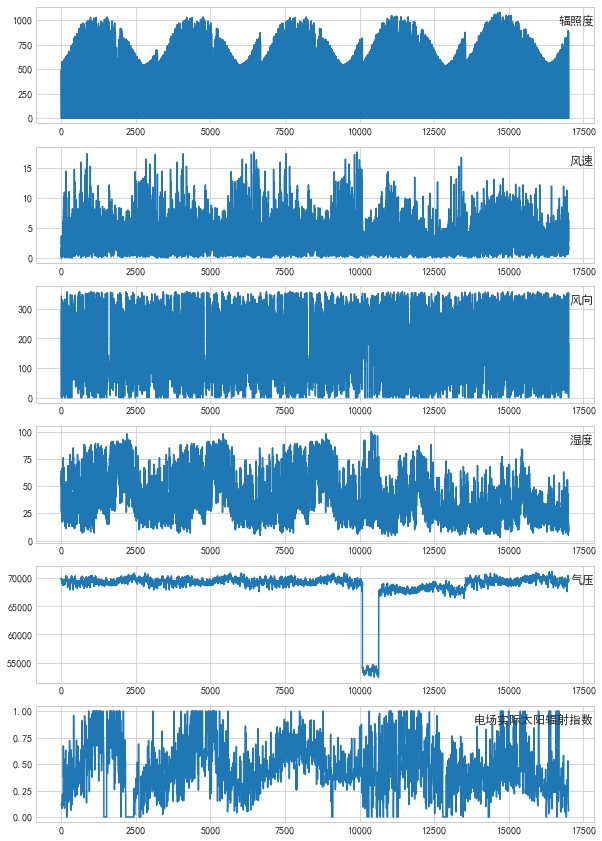

In [47]:
import matplotlib.pyplot as plt
# 加载数据
dataset=df_train
values=dataset.values
# 分组
groups=[1,2,3,5,6,7]
i=1

plt.figure(figsize=(10,15))

for group in groups:
    plt.subplot(len(groups),1,i)
    plt.plot(values[:,group])
    plt.title(dataset.columns[group],y=0.8,loc='right')
    i+=1
plt.show()

### 测试集

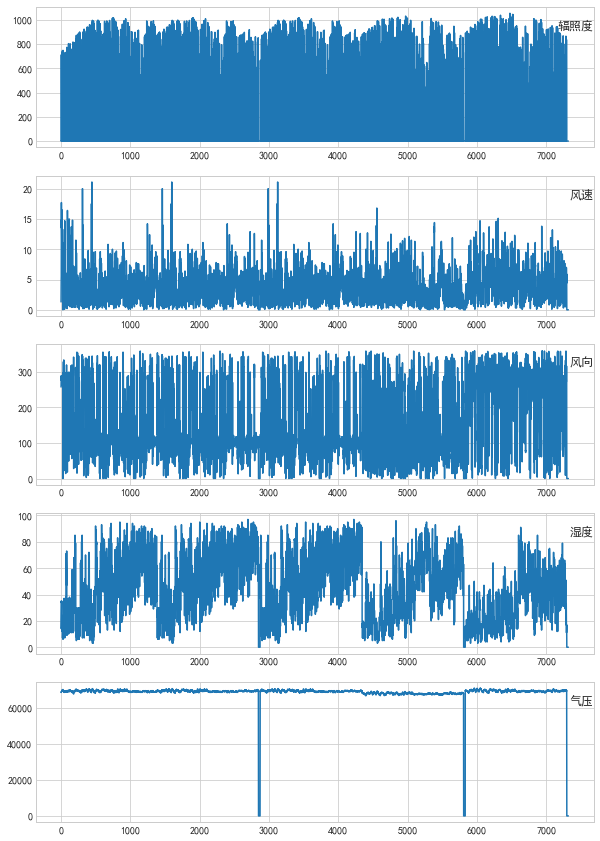

In [48]:
import matplotlib.pyplot as plt
# 加载数据
dataset=df_test
values=dataset.values
# 分组
groups=[1,2,3,5,6]
i=1

plt.figure(figsize=(10,15))

for group in groups:
    plt.subplot(len(groups),1,i)
    plt.plot(values[:,group])
    plt.title(dataset.columns[group],y=0.8,loc='right')
    i+=1
plt.show()